## Problem Statement

### Supplement Sales Prediction
Your Client WOMart is a leading nutrition and supplement retail chain that offers a comprehensive range of products for all your wellness and fitness needs. 

WOMart follows a multi-channel distribution strategy with 350+ retail stores spread across 100+ cities. 

Effective forecasting for store sales gives essential insight into upcoming cash flow, meaning WOMart can more accurately plan the cashflow at the store level.

Sales data for 18 months from 365 stores of WOMart is available along with information on Store Type, Location Type for each store, Region Code for every store, Discount provided by the store on every day, Number of Orders everyday etc.

Your task is to predict the store sales for each store in the test set for the next two months.

data set link for submission : https://datahack.analyticsvidhya.com/contest/job-a-thon-september-2021/#LeaderBoard

## Table of Content

* __Step 1: Importing the Relevant Libraries__
    
* __Step 2: Data Inspection__
    
* __Step 3: Data Cleaning__
    
* __Step 4: Exploratory Data Analysis__

* __Step 5: FeatureEngneering
    
* __Step 6: Building Model__

### Step 1: Importing the Relevant Libraries

In [2]:
import pandas as pd # 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression



import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')



## step 2 : Data Inspection

In [3]:
train = pd.read_csv('TRAIN.csv')
test = pd.read_csv('TEST_FINAL.csv')

In [4]:
train.shape , test.shape

((188340, 10), (22265, 8))

- we have __188340__ rows and __10__ columns in train dataset
- we have __22265__ rows and __8__ columns in test dataset

In [5]:
# ratio of null values 
print(train.isnull().sum()/train.shape[0])
print("")
print(test.isnull().sum()/train.shape[0])

ID               0.0
Store_id         0.0
Store_Type       0.0
Location_Type    0.0
Region_Code      0.0
Date             0.0
Holiday          0.0
Discount         0.0
#Order           0.0
Sales            0.0
dtype: float64

ID               0.0
Store_id         0.0
Store_Type       0.0
Location_Type    0.0
Region_Code      0.0
Date             0.0
Holiday          0.0
Discount         0.0
dtype: float64


* __we doesnot have any null values__

In [6]:
train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [7]:
objcol = train.select_dtypes(include=[np.object])
print("objcol =",objcol.columns)
numcol = train.select_dtypes(include=[np.float64,np.int64])
print("numcol = ",numcol.columns )

objcol = Index(['ID', 'Store_Type', 'Location_Type', 'Region_Code', 'Date', 'Discount'], dtype='object')
numcol =  Index(['Store_id', 'Holiday', '#Order', 'Sales'], dtype='object')


In [8]:
objcol = test.select_dtypes(include=[np.object])
numcol = test.select_dtypes(include=[np.float64,np.int64])
print("numcol = ",numcol.columns)
print("objcol =  ",objcol.columns)

numcol =  Index(['Store_id', 'Holiday'], dtype='object')
objcol =   Index(['ID', 'Store_Type', 'Location_Type', 'Region_Code', 'Date', 'Discount'], dtype='object')


## step3 : Data Cleaning

In [9]:
train.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64

In [10]:
test.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
dtype: int64

## Step:4 Exploratory Data Analysis(EDA)

In [11]:
train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [12]:
train['Store_Type'].value_counts()

S1    88752
S4    45924
S2    28896
S3    24768
Name: Store_Type, dtype: int64

<AxesSubplot:xlabel='Store_Type', ylabel='count'>

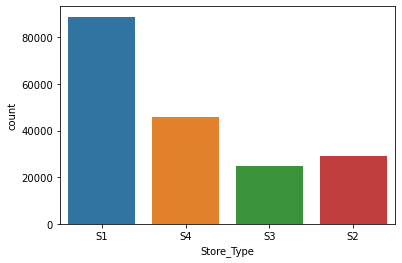

In [13]:
sns.countplot('Store_Type',data=train)

<AxesSubplot:xlabel='Location_Type', ylabel='count'>

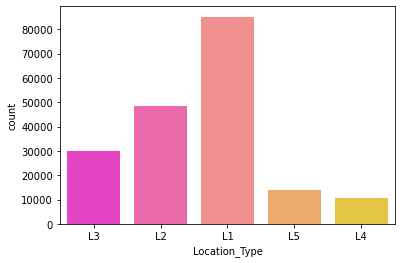

In [14]:
sns.countplot('Location_Type',data=train,palette='spring')

<AxesSubplot:xlabel='Region_Code', ylabel='count'>

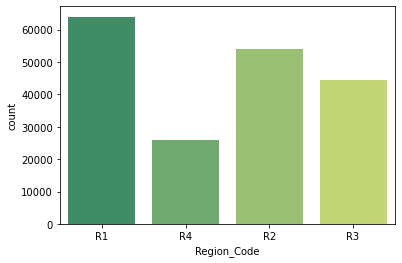

In [15]:
sns.countplot('Region_Code',data=train,palette='summer')

<AxesSubplot:xlabel='Holiday', ylabel='Sales'>

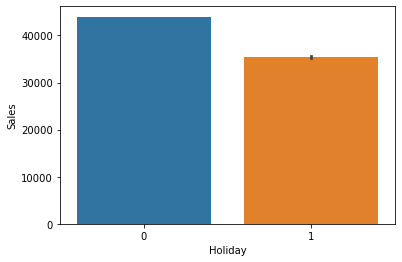

In [16]:
sns.barplot(x='Holiday',y='Sales',data=train)

<AxesSubplot:xlabel='Discount', ylabel='count'>

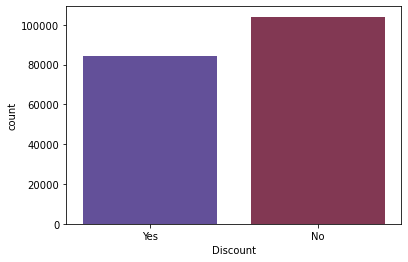

In [17]:
sns.countplot('Discount',data=train,palette='twilight')

<AxesSubplot:xlabel='#Order', ylabel='Sales'>

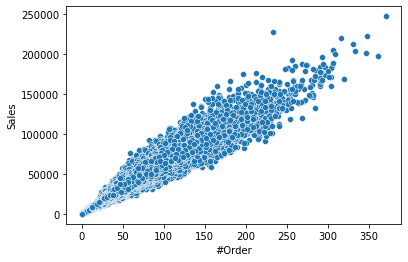

In [18]:
sns.scatterplot(x=train['#Order'],y=train['Sales'])

- here test data is differnt from train data by two columns they are __#order and Sales__
- and both have best relationship that we have predict two variales



## Step5: Feature Engneering

In [19]:
le = LabelEncoder()

In [20]:
# Labelencoding
le = LabelEncoder()
var_mod = train.select_dtypes(include='object').columns
for i in var_mod:
    train[i] = le.fit_transform(train[i])
var_mod1 = test.select_dtypes(include='object').columns
for i in var_mod1:
    test[i] = le.fit_transform(test[i])

In [21]:
# define dependant and ndependant variables
x1 = train.drop(['#Order', 'Sales'], axis = 1)
y1 = train['#Order']

In [22]:
# 20% data as validation set

x_train,x_valid,y_train,y_valid = train_test_split(x1,y1,test_size=0.2,random_state=50)

### Step 6: Building Model

### ML MODELS

In [23]:
from sklearn.ensemble import GradientBoostingRegressor

In [24]:
# Model Building
gbm=GradientBoostingRegressor()
gbm.fit(x_train,y_train)
y_pred = gbm.predict(x_valid)


In [25]:
MSE= metrics.mean_squared_error(y_valid,y_pred)
rmse = np.sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 16.975739588109843


In [26]:
#orderpredictions
oreder_values = gbm.predict(test)

In [27]:
test['#order'] = oreder_values

In [28]:
test.columns

Index(['ID', 'Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Date',
       'Holiday', 'Discount', '#order'],
      dtype='object')

In [29]:
# define dependant and ndependant variables
x2 = train.drop(['Sales'], axis = 1)
y2 = train['Sales']

In [30]:
x_train,x_valid,y_train,y_valid = train_test_split(x2,y2,test_size=0.2,random_state=22)

In [31]:
gbm.fit(x_train,y_train)
y_pred = gbm.predict(x_valid)

In [32]:
MSE= metrics.mean_squared_error(y_valid,y_pred)
rmse = np.sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 3720.681219634298


In [33]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [34]:
algos = [LinearRegression(),  Ridge(), Lasso(),
          KNeighborsRegressor(), DecisionTreeRegressor(),GradientBoostingRegressor()]

names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor','GradientBoostingRegressor']

rmse_list = []

In [35]:
for name in algos:
    model = name
    model.fit(x_valid,y_valid)
    y_pred = model.predict(x_valid)
    MSE= metrics.mean_squared_error(y_valid,y_pred)
    rmse = np.sqrt(MSE)
    rmse_list.append(rmse)
   


In [36]:
evaluation = pd.DataFrame({'Model': names,
                           'RMSE': rmse_list})

In [37]:
evaluation

,Model,RMSE
0,Linear Regression,5414.236166
1,Ridge Regression,5414.236171
2,Lasso Regression,5414.374661
3,K Neighbors Regressor,10157.084451
4,Decision Tree Regressor,0.000000
5,GradientBoostingRegressor,3648.142894


### Submission

In [ ]:
submission = pd.read_csv('SAMPLE.csv')
model = KNeighborsRegressor()
model.fit(x2, y2)
final_predictions = model.predict(test)
submission['Sales'] = final_predictions
#only positive predictions for the target variable
submission['Sales'] = submission['Sales'].apply(lambda x: 0 if x<0 else x)
submission.to_csv('my_submission_2KNN.csv', index=False)